<a href="https://colab.research.google.com/github/Manguriu/daata101/blob/main/Copy_of_Welcome_to_Colaboratory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Kwanza Tukule Data Analyst Assessment


Thank you for your interest in joining Kwanza Tukule. This assessment is designed to evaluate your technical, analytical, and problem-solving skills. The dataset provided represents anonymized sales data. Use it to complete the tasks below and demonstrate your ability to derive actionable insights and recommendations.

Please submit your work as a Jupyter Notebook, R script, Excel workbook, or a detailed PDF report.


Section 1: Data Cleaning and Preparation (20 points)

Data Quality Assessment: Inspect the dataset for missing values, duplicates, or inconsistent data types. Provide a summary of issues identified and the steps taken to resolve them.
Feature Engineering: Create the following columns: “Month-Year” (e.g., August 2024) from the “DATE” column. (include a screenshot of this in your submission)

Section 2: Exploratory Data Analysis (30 points)

Sales Overview:
Calculate total Quantity and Value grouped by:
Anonymized Category
Anonymized Business
Provide visualizations (e.g., bar charts or tables) to support your findings.

Trends Over Time: Analyze sales trends (Value and Quantity) by Month-Year. Create a time series plot to show seasonal patterns or changes in sales performance.
Performance Analysis:
Identify the top 5 most frequently purchased products (based on Quantity).
Identify the top 5 most valuable products (based on Value).


Section 3: Advanced Analysis (30 points)

Customer Segmentation:
Perform a segmentation analysis of businesses (Anonymized Business) based on their purchasing behavior:
Total Quantity purchased
Total Value contributed
Frequency of transactions
Classify businesses into 3 groups (e.g., High Value, Medium Value, Low Value) and provide recommendations for engagement with each group.
Forecasting: Using the provided data, forecast the total sales (Value) for the next 3 months. Use an appropriate time-series forecasting method (e.g., ARIMA, moving average, or exponential smoothing).
Anomaly Detection:Identify any unusual spikes or drops in sales performance (Quantity or Value) and explain possible reasons based on the data.
Correlation Analysis:Examine relationships between Quantity and Value. Provide insights into which factors drive sales performance.

Section 4: Strategic Insights and Recommendations (20 points)

Product Strategy: Based on your analysis, recommend one product category to prioritize for marketing campaigns. Justify your choice using the data.
Customer Retention: Identify businesses that have reduced their purchase frequency over time. Suggest strategies to re-engage these customers.
Operational Efficiency:Suggest improvements to inventory management or supply chain processes based on trends in product performance and seasonal demand.

Section 5: Dashboard and Reporting (20 points)

Create a dashboard summarizing key insights, including:
Total Quantity and Value by Anonymized Category.
Top-performing products and businesses.
A time-series chart of sales trends.
A segmentation summary of customer groups.
Use tools such as Power BI, Tableau, or a Python library (e.g., Plotly, Dash) to make the dashboard interactive (if possible). Provide a screenshot or link to the dashboard.


Bonus Section: Open-Ended Problem (Optional, 10 points)

Predictive Analysis: Identify external factors that could influence sales (e.g., economic conditions, competitor actions). Propose a methodology to incorporate such factors into future analyses.
Scalability: If the dataset were 10 times larger, what optimizations would you implement for data storage, processing, and analysis?

Instructions and Guidelines

Data is available on a google sheet here -> https://docs.google.com/spreadsheets/d/1E90iFRs0fbn3cldZCQo7cGZ8XmBDYpdHuqeUEC3TGXc/edit?gid=1416790554#gid=1416790554
Tools: You may use Python, R, SQL, Excel, or any other tool of your choice.
Submission: Include all code, visualizations, and explanations. Document your thought process clearly.
Time: You have 2 weeks to complete this assessment.


Evaluation Criteria

Data Cleaning and Preparation (20%)
Exploratory and Advanced Analysis (30%)
Insights and Recommendations (30%)
Dashboard and Reporting (20%)


##Section 1

In [6]:
import pandas as pd
sheet_url = "/content/Case Study Data - Read Only - case_study_data_2025-01-16T06_49_12.19881Z (1).csv"
data = pd.read_csv(sheet_url)


print(data.info())
print(data.describe())
print(data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333405 entries, 0 to 333404
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   DATE                 333405 non-null  object
 1   ANONYMIZED CATEGORY  333405 non-null  object
 2   ANONYMIZED PRODUCT   333405 non-null  object
 3   ANONYMIZED BUSINESS  333405 non-null  object
 4   ANONYMIZED LOCATION  333405 non-null  object
 5   QUANTITY             333405 non-null  int64 
 6   UNIT PRICE           333397 non-null  object
dtypes: int64(1), object(6)
memory usage: 17.8+ MB
None
            QUANTITY
count  333405.000000
mean        2.321186
std         3.790614
min         0.000000
25%         1.000000
50%         1.000000
75%         2.000000
max       359.000000
                       DATE ANONYMIZED CATEGORY ANONYMIZED PRODUCT  \
0  August 18, 2024, 9:32 PM        Category-106       Product-21f4   
1  August 18, 2024, 9:32 PM        Category-120       P

In [7]:
#Data Quality Assesments

missing_values = data.isnull().sum()
print("Here are the missing values", missing_values)

Here are the missing values DATE                   0
ANONYMIZED CATEGORY    0
ANONYMIZED PRODUCT     0
ANONYMIZED BUSINESS    0
ANONYMIZED LOCATION    0
QUANTITY               0
UNIT PRICE             8
dtype: int64


In [10]:
#Checking for duplicates
duplicates = data.duplicated().sum()
print(f"There are :{duplicates} duplicates")

There are :3524 duplicates


In [11]:
#Lets remove the data duplicate and save it
# Extract duplicate rows
duplicate_rows = data[data.duplicated()]

# Save duplicate rows to a CSV file
duplicate_file_path = '/content/duplicate_rows.csv'
duplicate_rows.to_csv(duplicate_file_path, index=False)

print("Duplicate rows saved to:", duplicate_file_path)


Duplicate rows saved to: /content/duplicate_rows.csv


In [13]:
#for better data quality lets drop the duplicate data
data = data.drop_duplicates()

# Verify removal
print(f"Remaining duplicate rows: {data.duplicated().sum()}")


Remaining duplicate rows: 0


In [14]:
#lets save the cleaned data now
cleaned_file_path = '/content/cleaned_data.csv'
data.to_csv(cleaned_file_path, index=False)

print("Cleaned data saved to:", cleaned_file_path)


Cleaned data saved to: /content/cleaned_data.csv


In [20]:
#Now lets work with the cleaned data
import pandas as pd
sheet_url = "/content/cleaned_data.csv"
NewData = pd.read_csv(sheet_url)


print(NewData.info())
print(NewData.describe())
print(NewData.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 329881 entries, 0 to 329880
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   DATE                 329881 non-null  object
 1   ANONYMIZED CATEGORY  329881 non-null  object
 2   ANONYMIZED PRODUCT   329881 non-null  object
 3   ANONYMIZED BUSINESS  329881 non-null  object
 4   ANONYMIZED LOCATION  329881 non-null  object
 5   QUANTITY             329881 non-null  int64 
 6   UNIT PRICE           329873 non-null  object
dtypes: int64(1), object(6)
memory usage: 17.6+ MB
None
            QUANTITY
count  329881.000000
mean        2.321507
std         3.767796
min         0.000000
25%         1.000000
50%         1.000000
75%         2.000000
max       359.000000
                       DATE ANONYMIZED CATEGORY ANONYMIZED PRODUCT  \
0  August 18, 2024, 9:32 PM        Category-106       Product-21f4   
1  August 18, 2024, 9:32 PM        Category-120       P

In [21]:
#lets cobvert data types for better performance
NewData['DATE'] = pd.to_datetime(NewData['DATE'])  # Ensure DATE is datetime type
NewData['QUANTITY'] = NewData['QUANTITY'].astype('int32')
NewData['UNIT PRICE'] = NewData['UNIT PRICE'].replace(',', '', regex=True).astype('float32')


<ipython-input-21-3b004c464a5b>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  NewData['DATE'] = pd.to_datetime(NewData['DATE'])  # Ensure DATE is datetime type


In [22]:
#3. Feature Engineering
# Create a Month-Year column:
NewData["Month-Year"]= NewData["DATE"].dt.strftime("%B %Y")

#Display dataset with the new column
print(NewData[["DATE","Month-Year"]].head())



                 DATE   Month-Year
0 2024-08-18 21:32:00  August 2024
1 2024-08-18 21:32:00  August 2024
2 2024-08-18 21:32:00  August 2024
3 2024-08-18 21:32:00  August 2024
4 2024-08-18 21:32:00  August 2024


In [24]:
#checking the whole data with the new added columns
print(NewData.head())

                 DATE ANONYMIZED CATEGORY ANONYMIZED PRODUCT  \
0 2024-08-18 21:32:00        Category-106       Product-21f4   
1 2024-08-18 21:32:00        Category-120       Product-4156   
2 2024-08-18 21:32:00        Category-121       Product-49bd   
3 2024-08-18 21:32:00         Category-76       Product-61dd   
4 2024-08-18 21:32:00        Category-119       Product-66e0   

  ANONYMIZED BUSINESS ANONYMIZED LOCATION  QUANTITY  UNIT PRICE   Month-Year  
0       Business-de42       Location-1ba8         1       850.0  August 2024  
1       Business-de42       Location-1ba8         2      1910.0  August 2024  
2       Business-de42       Location-1ba8         1      3670.0  August 2024  
3       Business-de42       Location-1ba8         1      2605.0  August 2024  
4       Business-de42       Location-1ba8         5      1480.0  August 2024  


In [25]:
#lets save the new data with new columns
cleaned_file_path = '/content/cleaned_data_with_columns.csv'
NewData.to_csv(cleaned_file_path, index=False)

print("Cleaned new_data saved to:", cleaned_file_path)



Cleaned new_data saved to: /content/cleaned_data_with_columns.csv


##Step 2: Exploratory Data Analysis

In [28]:
#Looking at the sales overview
# Lets group Anonymized Category and Anonymized Business:

category_sales = NewData.groupby('ANONYMIZED CATEGORY').agg({'QUANTITY': 'sum', 'UNIT PRICE': 'sum'}).reset_index()
business_sales = NewData.groupby('ANONYMIZED BUSINESS').agg({'QUANTITY': 'sum', 'UNIT PRICE': 'sum'}).reset_index()

print(category_sales.head(12))
print(business_sales.head(12))


  ANONYMIZED CATEGORY  QUANTITY  UNIT PRICE
0        Category-100     76824  30783426.0
1        Category-101     19585  12225757.0
2        Category-102      1786    270769.0
3        Category-104      1217   1278629.0
4        Category-105      1579   2121947.0
  ANONYMIZED BUSINESS  QUANTITY  UNIT PRICE
0       Business-0000         8     10445.0
1       Business-0005         1      2645.0
2       Business-0029        26     18385.0
3       Business-003d        98     73251.0
4       Business-0072       127    194501.0


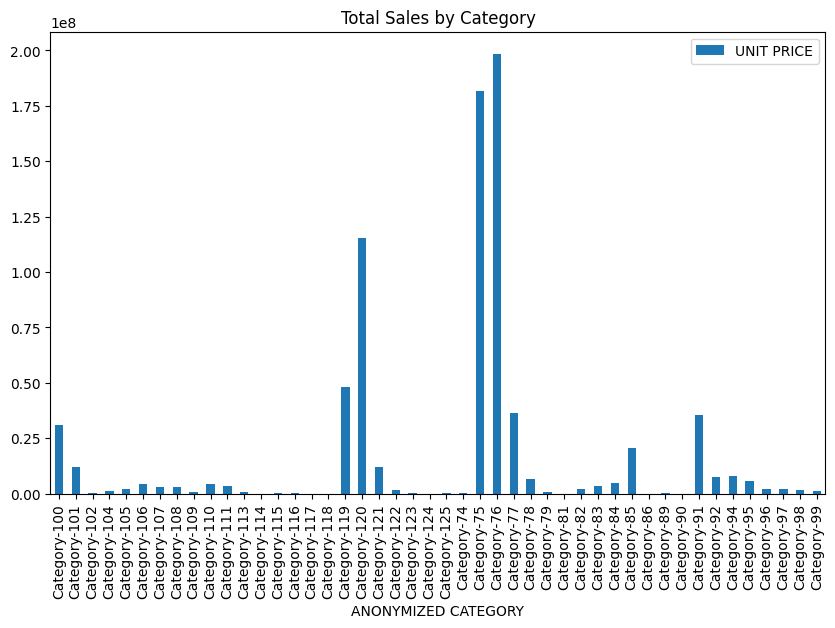

In [33]:
#Visualization
import matplotlib.pyplot as plt

# Bar plot for category sales
category_sales.plot(x='ANONYMIZED CATEGORY', y='UNIT PRICE', kind='bar', title='Total Sales by Category', figsize=(10, 6))
plt.show()


In [32]:
#2. Trends Over Time grouped by month-year
monthly_trends = NewData.groupby('Month-Year').agg({'QUANTITY': 'sum', 'UNIT PRICE': 'sum'}).reset_index()
print(monthly_trends.head(12))


        Month-Year  QUANTITY  UNIT PRICE
0       April 2024     50554  48452360.0
1      August 2024     68859  64574376.0
2    December 2024     57631  53702904.0
3    February 2024     44063  53537044.0
4     January 2024     67526  70511152.0
5        July 2024     74691  73511536.0
6        June 2024     60717  59761092.0
7       March 2024     45382  49988736.0
8         May 2024     69551  69627696.0
9    November 2024     75361  73430632.0
10    October 2024     84739  82152976.0
11  September 2024     66747  65730448.0


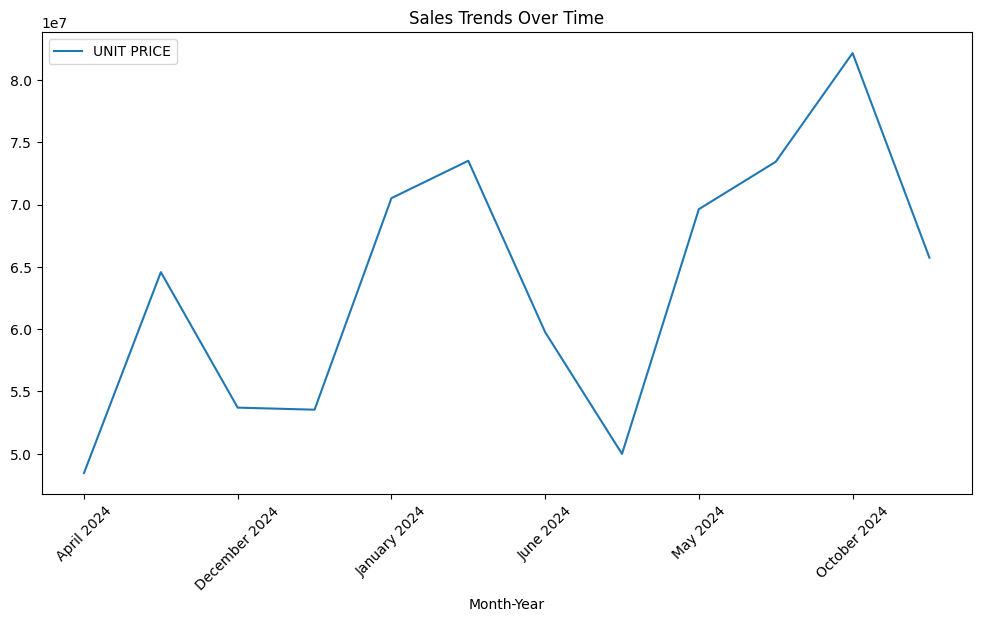

In [34]:
# A time series plot on the same
monthly_trends.plot(x='Month-Year', y='UNIT PRICE', kind='line', title='Sales Trends Over Time', figsize=(12, 6))
plt.xticks(rotation=45)
plt.show()


In [35]:
# performance analysis of the top 5 products
top_products_quantity = NewData.groupby('ANONYMIZED PRODUCT')['QUANTITY'].sum().nlargest(5)
top_products_value = NewData.groupby('ANONYMIZED PRODUCT')['UNIT PRICE'].sum().nlargest(5)

print("Top 5 Products by QUANTITY:\n", top_products_quantity)
print("Top 5 Products by UNITPRICE:\n", top_products_value)


Top 5 Products by QUANTITY:
 ANONYMIZED PRODUCT
Product-66e0    46957
Product-e805    42602
Product-8f75    37566
Product-29ee    35940
Product-4156    28487
Name: QUANTITY, dtype: int32
Top 5 Products by UNITPRICE:
 ANONYMIZED PRODUCT
Product-e805    151785312.0
Product-8f75     63007632.0
Product-66e0     27880230.0
Product-2175     24141324.0
Product-d09c     24020716.0
Name: UNIT PRICE, dtype: float32


##Step 3: Advanced Analysis






In [38]:
#Customer Segmentation
#Creating a summary metrics for each business:
business_summary = NewData.groupby('ANONYMIZED BUSINESS').agg(
    total_quantity=('QUANTITY', 'sum'),
    total_value=('UNIT PRICE', 'sum'),
    transaction_count=('DATE', 'count')
).reset_index()

print(business_summary.head(12))


   ANONYMIZED BUSINESS  total_quantity  total_value  transaction_count
0        Business-0000               8      10445.0                  8
1        Business-0005               1       2645.0                  1
2        Business-0029              26      18385.0                  6
3        Business-003d              98      73251.0                 31
4        Business-0072             127     194501.0                101
5        Business-0078             317     882264.0                254
6        Business-007a               2       4010.0                  2
7        Business-0086               6      11200.0                  6
8        Business-00a2               9      17645.0                  7
9        Business-00a7               5       1885.0                  1
10       Business-00ac              10      22210.0                 10
11       Business-00b7               2       2900.0                  2


In [39]:
#classifying businesses into segments
business_summary['Segment'] = pd.qcut(business_summary['total_value'], 3, labels=['Low Value', 'Medium Value', 'High Value'])
print(business_summary['Segment'].value_counts())


Segment
Low Value       1600
Medium Value    1600
High Value      1600
Name: count, dtype: int64


In [45]:
# #Forecasting Using Exponential Smoothing:
# # Simple moving average
# monthly_trends['Rolling_Mean'] = monthly_trends['UNIT PRICE'].rolling(window=3).mean()

# # Forecast the next 3 months using the last rolling mean
# last_mean_value = monthly_trends['Rolling_Mean'].iloc[-1]
# forecast = [last_mean_value] * 3
# print("Next 3 months sales forecast using moving average:", forecast)


Next 3 months sales forecast using moving average: [73771352.0, 73771352.0, 73771352.0]


In [48]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Model without seasonal component
model = ExponentialSmoothing(monthly_trends['UNIT PRICE'], trend='add', seasonal=None).fit()
forecast = model.forecast(steps=3)
print("Next 3 months sales forecast:\n", forecast)


Next 3 months sales forecast:
 12    7.370329e+07
13    7.529893e+07
14    7.689456e+07
dtype: float64


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


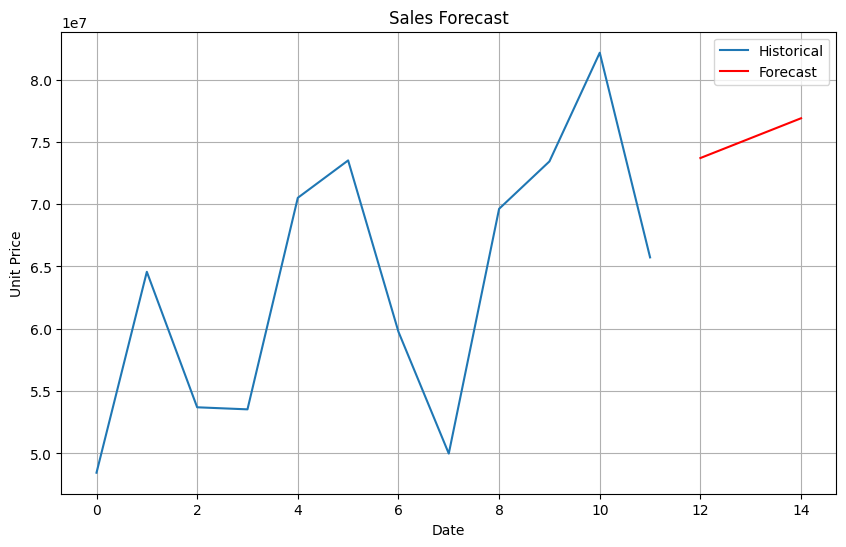

In [52]:

# Plot historical data
monthly_trends['UNIT PRICE'].plot(label='Historical', figsize=(10, 6))

# Plot forecast data
forecast.plot(label='Forecast', color='red')

# Add labels and legend
plt.title('Sales Forecast')
plt.xlabel('Date')
plt.ylabel('Unit Price')
plt.legend()
plt.grid(True)
plt.show()



In [53]:
#Anomaly Detection  Detect spikes or drops using standard deviation:
NewData['Value_Change'] = NewData['UNIT PRICE'].diff()
anomalies = NewData[NewData['Value_Change'].abs() > NewData['Value_Change'].std()]

print("Anomalies detected:\n", anomalies)


Anomalies detected:
                       DATE ANONYMIZED CATEGORY ANONYMIZED PRODUCT  \
13     2024-06-23 19:37:00         Category-75       Product-8f75   
14     2024-11-25 16:42:00         Category-82       Product-91f3   
25     2024-05-23 20:22:00         Category-85       Product-5ab4   
27     2024-05-23 20:22:00        Category-113       Product-9c60   
29     2024-09-27 21:33:00         Category-94       Product-77bc   
...                    ...                 ...                ...   
329871 2024-09-19 13:27:00         Category-75       Product-faa5   
329872 2024-03-15 17:31:00         Category-78       Product-46ef   
329875 2024-03-15 20:04:00         Category-76       Product-e805   
329876 2024-11-13 13:59:00        Category-121       Product-898d   
329880 2024-10-10 18:19:00         Category-75       Product-b31e   

       ANONYMIZED BUSINESS ANONYMIZED LOCATION  QUANTITY  UNIT PRICE  \
13           Business-2460       Location-4ea1         1      4000.0   
14    

In [54]:
#Correlation Analysis to Calculate correlation between Quantity and Value:

correlation = NewData[['QUANTITY', 'UNIT PRICE']].corr()
print("Correlation between QUANTITY and UNIT PRICE:\n", correlation)


Correlation between QUANTITY and UNIT PRICE:
             QUANTITY  UNIT PRICE
QUANTITY    1.000000   -0.003511
UNIT PRICE -0.003511    1.000000


##Step 4: Strategic Insights and Recommendations

In [56]:
#Based on top products and sales performance, recommend a category to prioritize.
prioritized_category = category_sales.sort_values(by='UNIT PRICE', ascending=False).iloc[0]
print("Recommended category for marketing:", prioritized_category)


Recommended category for marketing: ANONYMIZED CATEGORY    Category-76
QUANTITY                     71719
UNIT PRICE             198499344.0
Name: 26, dtype: object


In [57]:
#Identify businesses with declining transaction frequency.
frequency_change = business_summary.sort_values(by='transaction_count').head(10)
print("Businesses with reduced purchase frequency:\n", frequency_change)


Businesses with reduced purchase frequency:
      ANONYMIZED BUSINESS  total_quantity  total_value  transaction_count  \
4691       Business-fa66              10       4390.0                  1   
4435       Business-ec78               1       5910.0                  1   
456        Business-1873               1        250.0                  1   
2924       Business-98d9               1       1860.0                  1   
1433       Business-4920               5       5400.0                  1   
2429       Business-7d4f               1       5480.0                  1   
4182       Business-dec6               1       4100.0                  1   
4493       Business-efcb               1       2225.0                  1   
2418       Business-7d06               1       4000.0                  1   
1061       Business-36a2               1       4020.0                  1   

        Segment  
4691  Low Value  
4435  Low Value  
456   Low Value  
2924  Low Value  
1433  Low Value  
2429  Low 

##Section 5: Dashboard and Reporting

In [58]:
import plotly.express as px

# Sales by Category
fig = px.bar(category_sales, x='ANONYMIZED CATEGORY', y='UNIT PRICE', title='Sales by Category')
fig.show()

# Time-series sales trends
fig = px.line(monthly_trends, x='Month-Year', y='UNIT PRICE', title='Monthly Sales Trends')
fig.show()

# Customer Segmentation Summary
fig = px.pie(business_summary, names='Segment', values='total_value', title='Customer Segmentation')
fig.show()


In [65]:
!pip install dash


# Import required libraries
import dash
from dash import dcc, html
import plotly.express as px
import pandas as pd

# category_sales, monthly_trends, and business_summary should be available in the environment

# Initialize the Dash app
app = dash.Dash(__name__)

# Define the layout
app.layout = html.Div([
    html.H1("Interactive Sales Dashboard", style={'textAlign': 'center'}),

    # Sales by Category
    html.Div([
        html.H2("Sales by Category"),
        dcc.Graph(
            id='sales-by-category',
            figure=px.bar(category_sales, x='ANONYMIZED CATEGORY', y='UNIT PRICE', title='Sales by Category')
        )
    ]),

    # Monthly Sales Trends
    html.Div([
        html.H2("Monthly Sales Trends"),
        dcc.Graph(
            id='monthly-sales-trends',
            figure=px.line(monthly_trends, x='Month-Year', y='UNIT PRICE', title='Monthly Sales Trends')
        )
    ]),

    # Customer Segmentation Summary
    html.Div([
        html.H2("Customer Segmentation"),
        dcc.Graph(
            id='customer-segmentation',
            figure=px.pie(business_summary, names='Segment', values='total_value', title='Customer Segmentation')
        )
    ])
])

# Run the Dash app
app.run_server(host='0.0.0.0', port=3000, debug=True)


<IPython.core.display.Javascript object>